# Modeling Wine Quality 

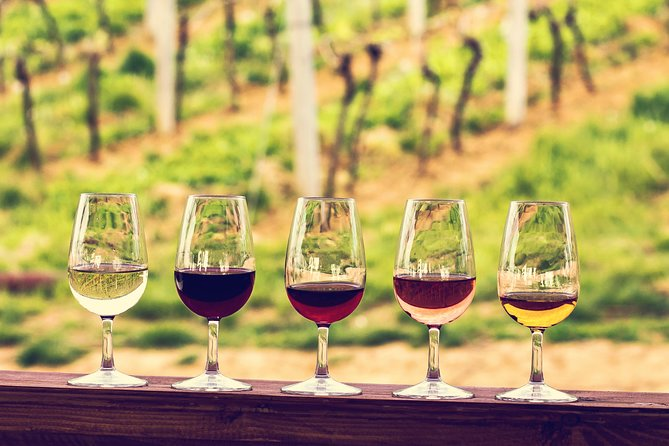

## Overview
In this project, we will use linear regression to predict the quality of wine based on its chemical characteristics. 

## Business Problem
The Washington Winegrower's Association is would like to increase their performance in competitions. To help their wineries select which wines to send to competition, they asked us to develop a model that can predict how well a wine can be expected to perform based on it's chemical properties. 

## Data Understanding 
To accomplish this, we used at a dataset provided by UCI, provided by Kaggle, that contains information on the chemical breakdown and rated quality of red and white wines. In our model, we will use wine quality as our dependent variable. Information regarding the physiochemical properties of the wine will make up our independent variables. These include: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates and alcohol.

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from functions import model as m
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [152]:
white = pd.read_csv('wines/WineQuality-WhiteWine.csv')
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [153]:
red = pd.read_csv('wines/WineQuality-WhiteWine.csv')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Data Prepartation

This source seperated the analysis of red and white wines into two datasets. Since we want to create a single model that takes into account differences associated with red and white wines, we combined the datasets and created two new columns - red and white. 

In [154]:
white['white'] = 1
white['red'] = 0
red['white'] = 0
red['red'] = 1

In [155]:
df = pd.concat([white, red], ignore_index = True)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,white,red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0


In [156]:
#renaming columns to get rid of spaces 
df.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity':'volatile_acidity',
                      'citric acid':'citric_acid', 'residual sugar':'residual_sugar',
                      'free sulfur dioxide':'free_sulfur_dioxide',
                      'total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,white,red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0


Next, we created multiple different visualizations to better understand the relationship between our independent and dependent variables. 

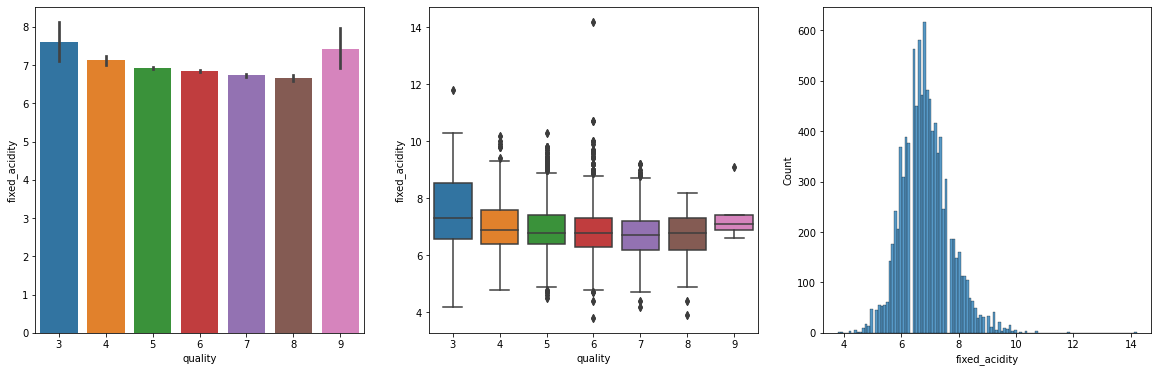

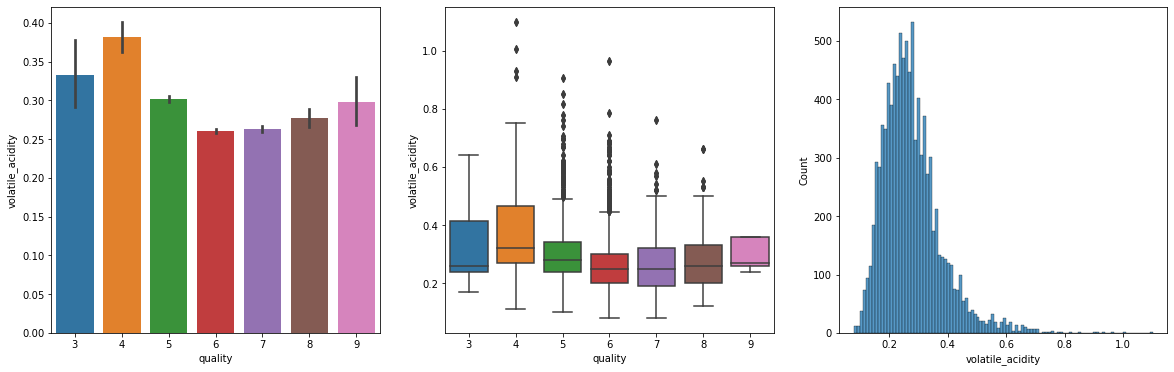

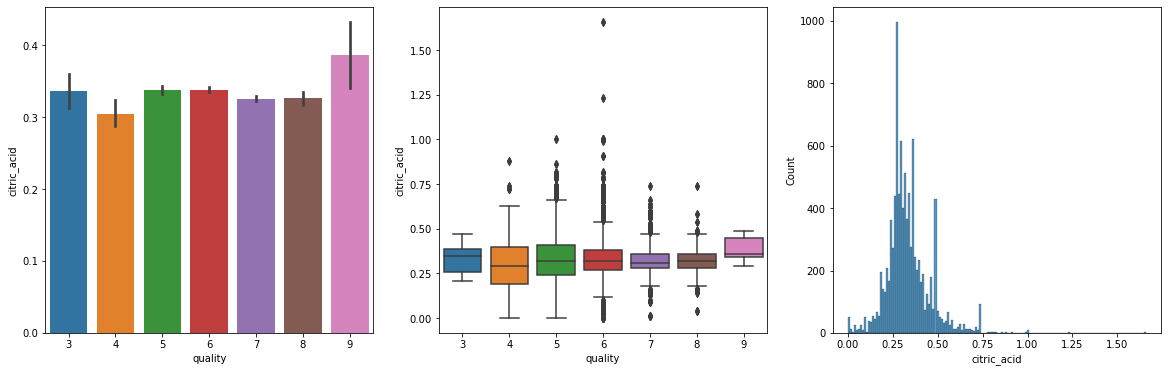

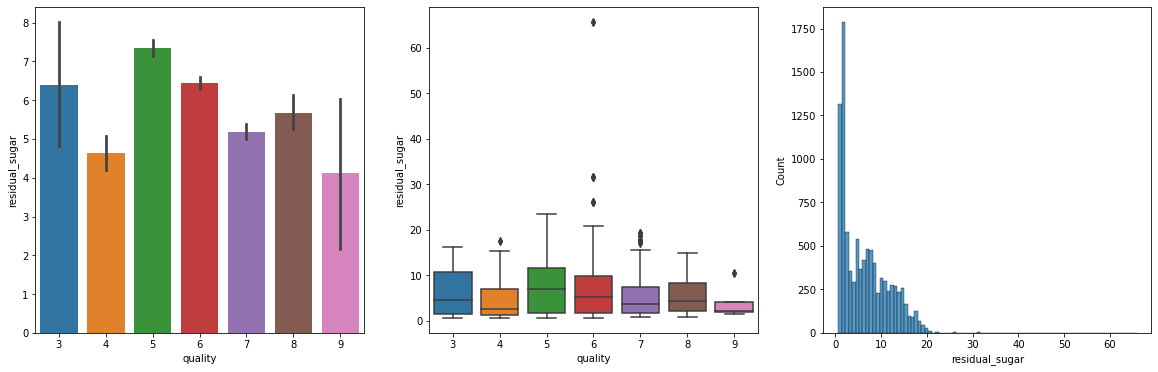

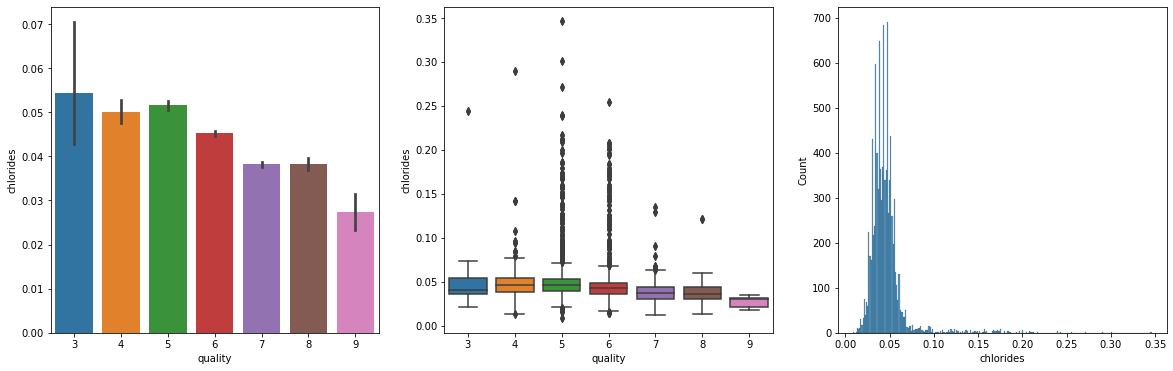

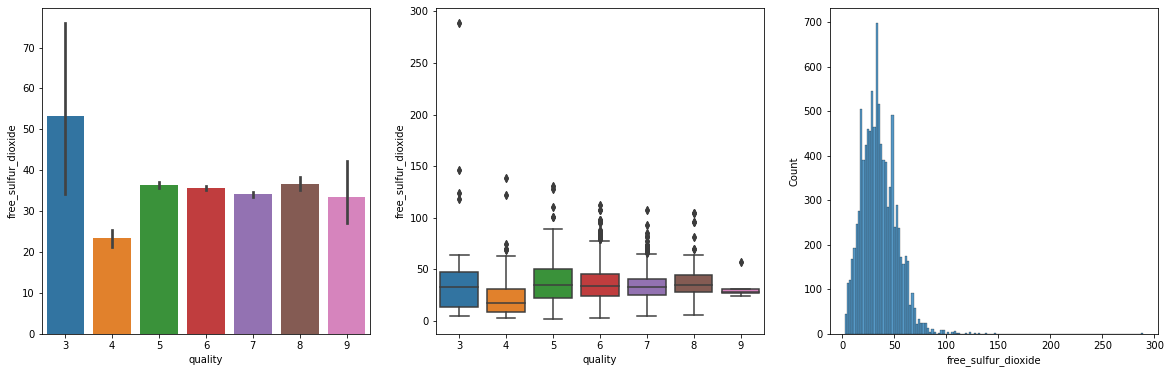

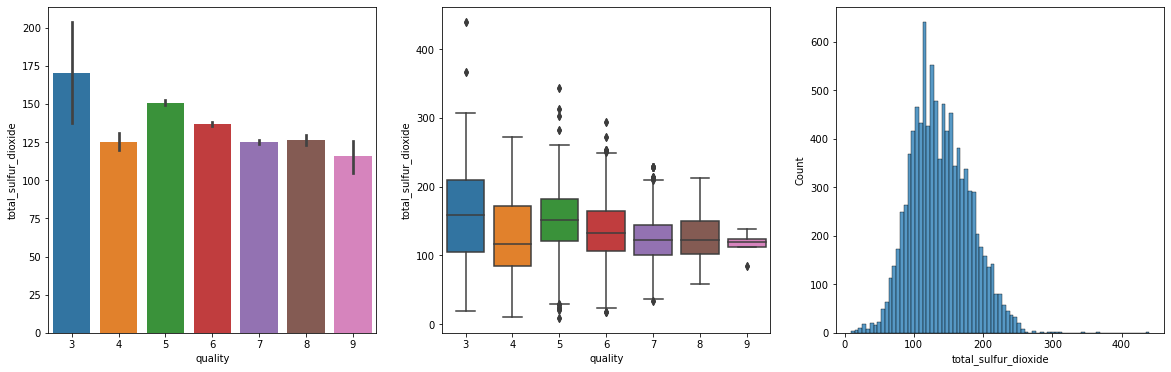

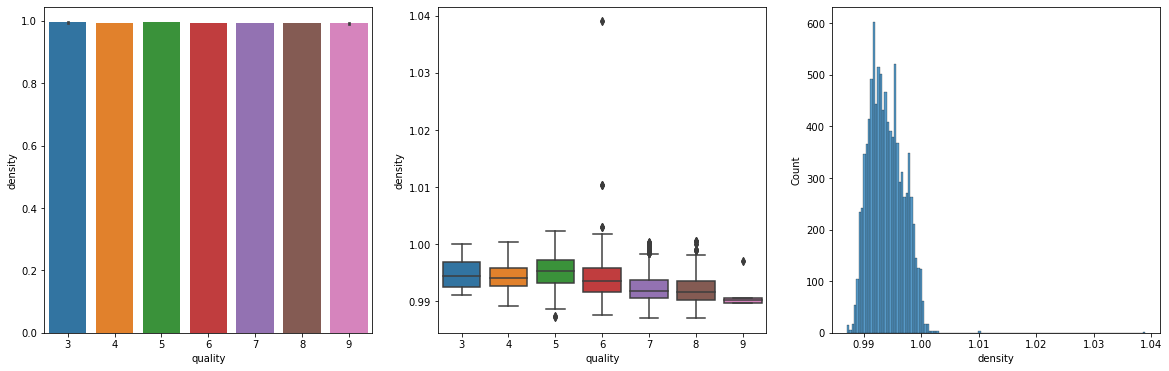

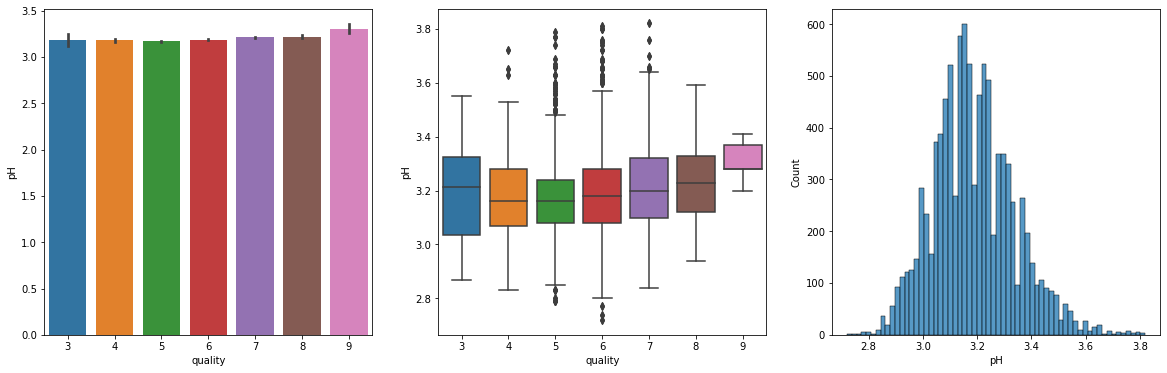

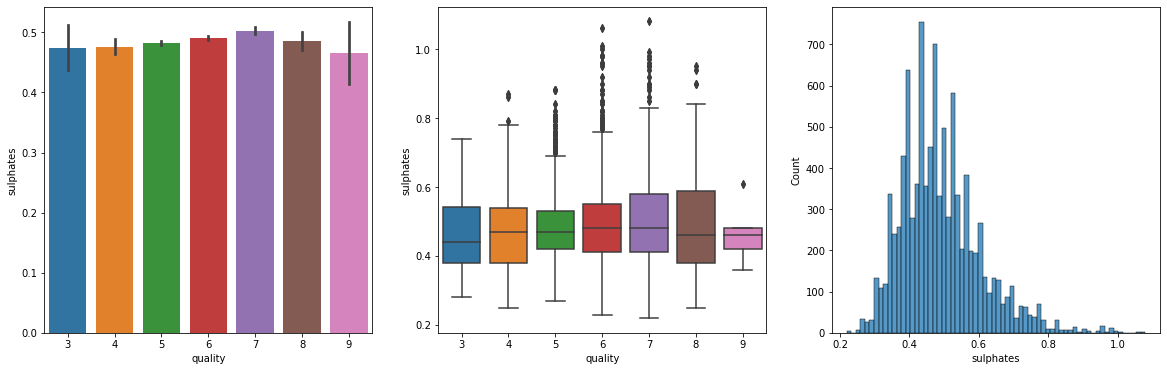

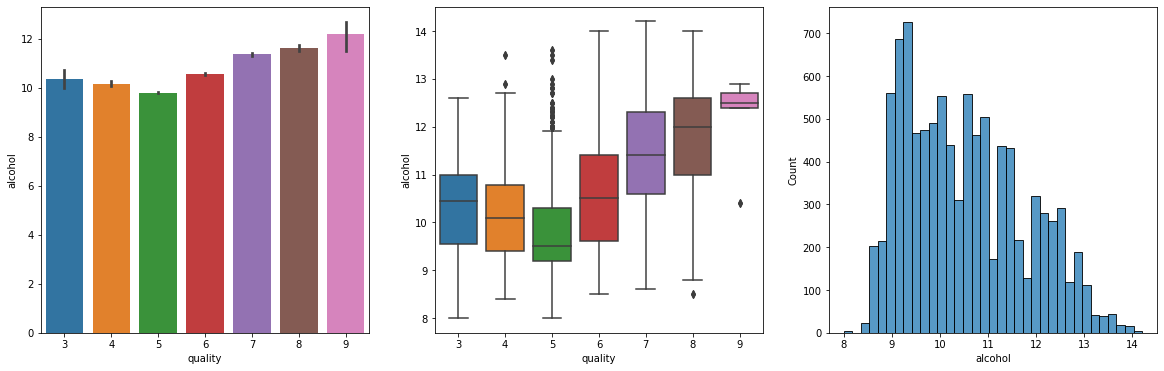

In [157]:
for column in df.iloc[:, :-3]:
    fig, ax = plt.subplots(1,3, figsize=(20, 6))
    sns.barplot(data=df, x='quality', y=column, ax=ax[0])
    sns.boxplot(data=df, x='quality', y=column, ax=ax[1])
    sns.histplot(data=df, x=column, ax=ax[2])
    plt.show()

We will now seperate our data into training and testing subsets to prevent data leakage and accurately validate our model when it is complete.

In [158]:
y = df[['quality']]
x = df.drop(['quality'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

## Data Modeling 
### Baseline Model

In [159]:
m(x_train, x_test, y_train, y_test)

Train Mean Square Error: 0.5607671699351024
Test Mean Square Error: 0.5733356746024665
Train Root Mean Square Error: 0.7488438888948099
Test Root Mean Square Error: 0.7571893254678558


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     252.7
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:04:09   Log-Likelihood:                -8852.4
No. Observations:                7836   AIC:                         1.773e+04
Df Residuals:                    7823   BIC:                         1.782e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              109.2157     10.492     10.409      0.000      88.648     129.783
fixed_acidity            0.0738      0.017      4.343      0.000       0.041       0.107
volatile_acidity        -1.8433      0.091    -20.341      0.000      -2.021      -1.666
citric_acid              0.0631      0.075      0.841      0.400      -0.084       0.210
residual_sugar           0.0869      0.006     14.036      0.000       0.075       0.099
chlorides               -0.2068      0.426     -0.485      0.627      -1.042       0.629
free_sulfur_dioxide      0.0038      0.001      5.663      0.000       0.002       0.005
total_sulfur_dioxide    -0.0004      0.000     -1.179      0.238      -0.001       0.000
density               -164.0646     15.961    -10.279      0.000    -195.352    -132.777
pH                       0.7283      0.085      8.544      0.000       0.561       0.895
sulphates                0.6585      0.080      8.253      0.000       0.502       0.815
alcohol                  0.1756      0.020      8.696      0.000       0.136       0.215
white                   54.6124      5.246     10.410      0.000      44.329      64.896
red                     54.6033      5.246     10.408      0.000      44.320      64.887
==============================================================================
Omnibus:                      164.098   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              348.036
Skew:                           0.069   Prob(JB):                     2.66e-76
Kurtosis:                       4.023   Cond. No.                     1.30e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis:** With an R-squared of 0.279, this model has plenty of room for improvement! P-values for citric acid, chlorides, and total sulfur dioxide are high.

### Iteration 1

For this iteration, we will transform chlorides and total sulfur dioxide and citric acid, because those variables had insignificant P-values in our baseline model. Our hope is that transforming these three variables will improve the model.

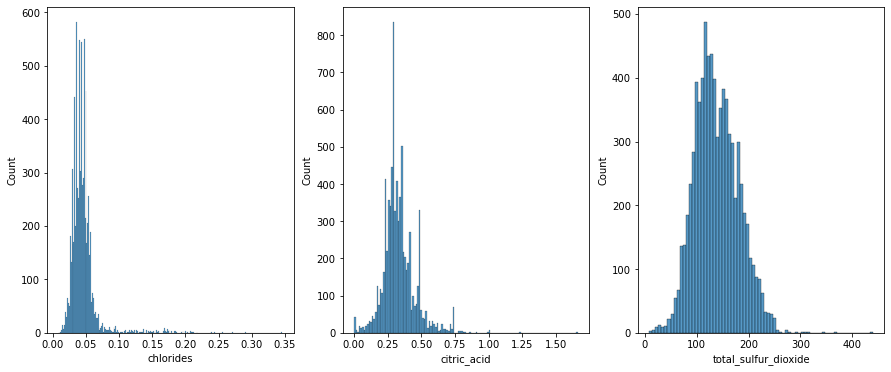

In [160]:
fig, ax = plt.subplots(1,3, figsize=(15, 6))
sns.histplot(data=x_train, x='chlorides', ax=ax[0])
sns.histplot(data=x_train, x='citric_acid', ax=ax[1])
sns.histplot(data=x_train, x='total_sulfur_dioxide', ax=ax[2]);

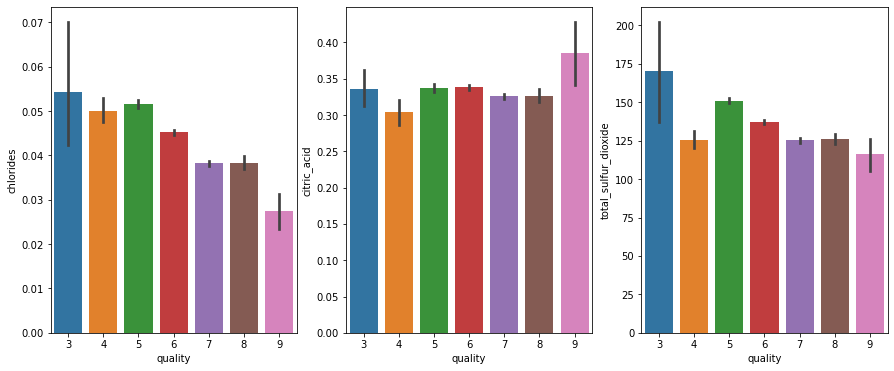

In [161]:
fig, ax = plt.subplots(1,3, figsize=(15, 6))
sns.barplot(data=df, x='quality', y='chlorides', ax=ax[0])
sns.barplot(data=df, x='quality', y='citric_acid', ax=ax[1])
sns.barplot(data=df, x='quality', y='total_sulfur_dioxide', ax=ax[2]);

Chlorides and total sulfur dioxide seem to have a fairly linear relationship with quality, but the distributions are slightly skewed, so we will use a log transformation to help normalize the distributions.
Citric acid has a more normal distribution and a less linear relationship to quality. It's a bit hard to tell, but the relationship sort of resembles a parabola, so we will try taking the square root of that column.

In [162]:
x_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,white,red
7353,7.8,0.32,0.33,10.4,0.031,47.0,194.0,0.99692,3.07,0.58,9.6,0,1
2915,6.9,0.14,0.38,1.0,0.041,22.0,81.0,0.99043,3.03,0.54,11.4,1,0
4883,4.9,0.47,0.17,1.9,0.035,60.0,148.0,0.98964,3.27,0.35,11.5,1,0
7568,5.9,0.34,0.31,2.0,0.030,38.0,142.0,0.98892,3.40,0.41,12.9,0,1
9045,6.8,0.18,0.35,5.4,0.054,53.0,143.0,0.99287,3.10,0.54,11.0,0,1


In [163]:
x_train['chlorides'] = np.log(x_train['chlorides'])
x_train['total_sulfur_dioxide'] = np.log(x_train['total_sulfur_dioxide'])
x_train['citric_acid'] = np.sqrt(x_train['citric_acid'])

In [164]:
x_test['chlorides'] = np.log(x_test['chlorides'])
x_test['total_sulfur_dioxide'] = np.log(x_test['total_sulfur_dioxide'])
x_test['citric_acid'] = np.sqrt(x_test['citric_acid'])

In [165]:
m(x_train, x_test, y_train, y_test)

Train Mean Square Error: 0.5593593194920947
Test Mean Square Error: 0.5704884562546888
Train Root Mean Square Error: 0.7479032821776455
Test Root Mean Square Error: 0.7553068623113978


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     255.0
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:04:12   Log-Likelihood:                -8842.6
No. Observations:                7836   AIC:                         1.771e+04
Df Residuals:                    7823   BIC:                         1.780e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              117.2923     10.490     11.181      0.000      96.728     137.856
fixed_acidity            0.0719      0.017      4.224      0.000       0.039       0.105
volatile_acidity        -1.8715      0.091    -20.613      0.000      -2.049      -1.693
citric_acid              0.1940      0.086      2.255      0.024       0.025       0.363
residual_sugar           0.0897      0.006     14.492      0.000       0.078       0.102
chlorides               -0.0590      0.031     -1.935      0.053      -0.119       0.001
free_sulfur_dioxide      0.0019      0.001      2.967      0.003       0.001       0.003
total_sulfur_dioxide     0.1338      0.036      3.682      0.000       0.063       0.205
density               -177.0613     15.964    -11.091      0.000    -208.356    -145.767
pH                       0.7342      0.085      8.650      0.000       0.568       0.901
sulphates                0.6273      0.080      7.874      0.000       0.471       0.783
alcohol                  0.1645      0.020      8.142      0.000       0.125       0.204
white                   58.6505      5.245     11.182      0.000      48.368      68.933
red                     58.6418      5.245     11.180      0.000      48.360      68.924
==============================================================================
Omnibus:                      163.243   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.039
Skew:                           0.084   Prob(JB):                     2.39e-74
Kurtosis:                       4.005   Cond. No.                     3.62e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis:** R2 increased from .279 to .281 by transforming these variables. p-values for citric acid and total sulfur dioxide are now significant, chlorides p-value decreased but is still insignificant. Will look into collinearity between features in next iteration to see if it will help improve R2 and p-value for chlorides.

### Iteration 2

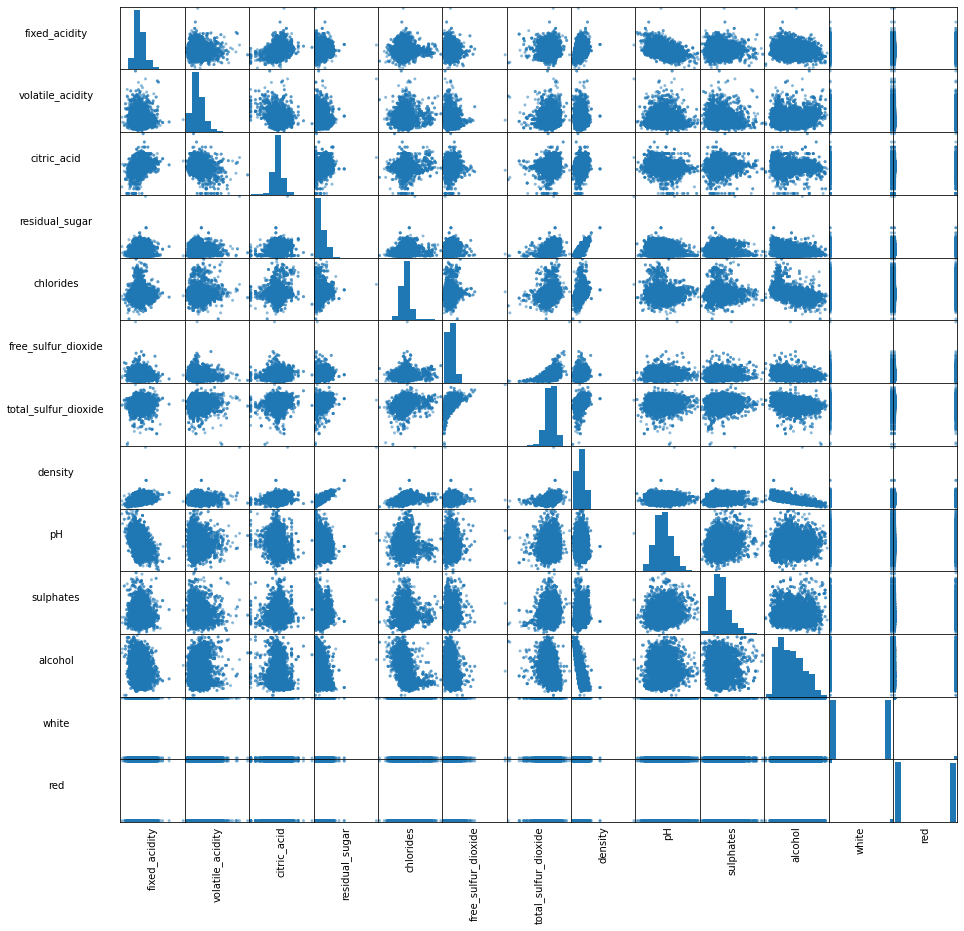

In [166]:
matrix = pd.plotting.scatter_matrix(x_train, figsize  = [15, 15]);

[s.xaxis.label.set_rotation(90) for s in matrix.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in matrix.reshape(-1)]


[s.get_yaxis().set_label_coords(-1,0.5) for s in matrix.reshape(-1)]

[s.set_xticks(()) for s in matrix.reshape(-1)]
[s.set_yticks(()) for s in matrix.reshape(-1)]

plt.show()

In [167]:
df_ = x_train.corr().abs().stack().reset_index().sort_values(0,ascending=False)
df_['pairs'] = list(zip(df_.level_0, df_.level_1))
df_.set_index(['pairs'], inplace=True)
df_.drop(columns=['level_1','level_0'],inplace=True)
df_.columns = ['cc']
df_.drop_duplicates(inplace=True)
df_[(df_.cc>.75) & (df_.cc<1)]

,cc
pairs,
"(residual_sugar, density)",0.836888
"(alcohol, density)",0.788116


Significant correlations exist between density and residual sugar along with density and alcohol. We will remove density as a variable to fix the multicollinearity within the features.

In [168]:
x_train.drop(['density'], axis=1, inplace=True)
x_test.drop(['density'], axis=1, inplace=True)

In [169]:
m(x_train, x_test, y_train, y_test)

Train Mean Square Error: 0.5681549403244275
Test Mean Square Error: 0.5761751299110626
Train Root Mean Square Error: 0.7537605324799299
Test Root Mean Square Error: 0.7590620066312518


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     262.9
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:04:27   Log-Likelihood:                -8903.7
No. Observations:                7836   AIC:                         1.783e+04
Df Residuals:                    7824   BIC:                         1.792e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.9634      0.206      4.687      0.000       0.561       1.366
fixed_acidity           -0.0660      0.012     -5.635      0.000      -0.089      -0.043
volatile_acidity        -1.9816      0.091    -21.788      0.000      -2.160      -1.803
citric_acid              0.1378      0.087      1.593      0.111      -0.032       0.307
residual_sugar           0.0248      0.002     12.250      0.000       0.021       0.029
chlorides               -0.1237      0.030     -4.099      0.000      -0.183      -0.065
free_sulfur_dioxide      0.0029      0.001      4.494      0.000       0.002       0.004
total_sulfur_dioxide     0.0581      0.036      1.614      0.107      -0.012       0.129
pH                       0.1281      0.065      1.957      0.050      -0.000       0.256
sulphates                0.3829      0.077      4.963      0.000       0.232       0.534
alcohol                  0.3639      0.009     39.127      0.000       0.346       0.382
white                    0.4860      0.103      4.712      0.000       0.284       0.688
red                      0.4774      0.103      4.631      0.000       0.275       0.679
==============================================================================
Omnibus:                      151.875   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.072
Skew:                           0.067   Prob(JB):                     2.83e-68
Kurtosis:                       3.967   Cond. No.                     3.62e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis:** R2 decreased from .281 to .270 with the removal of density. p-value of chlorides became significant, however; p-values for citric acid, total sulfur dioxide and pH are now insignificant.  

### Iteration 3
For our next iteration, we will look at the histograms for each variable and perform additional log transformations to make the distributions more normal.

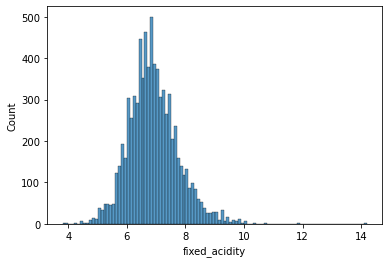

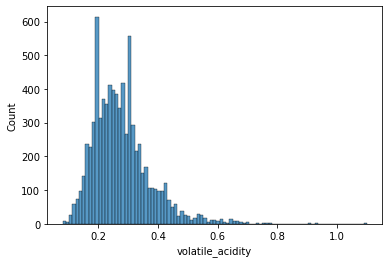

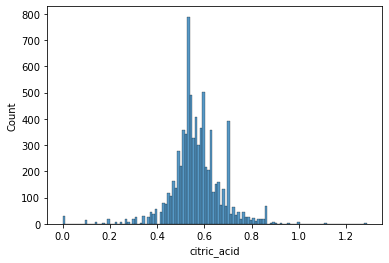

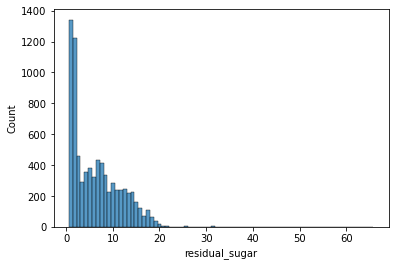

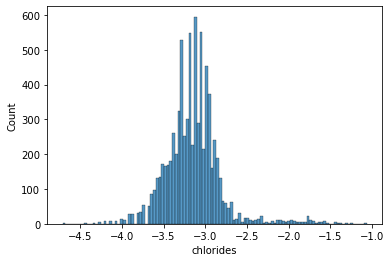

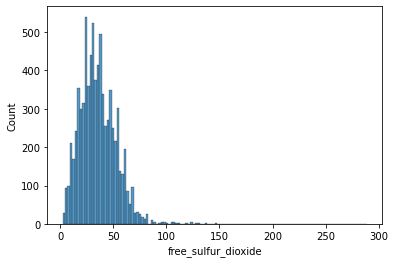

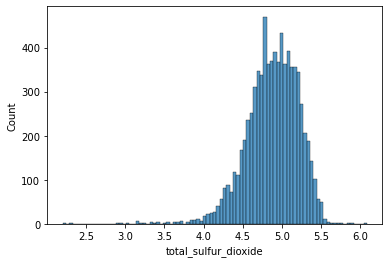

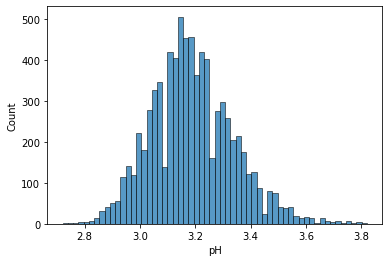

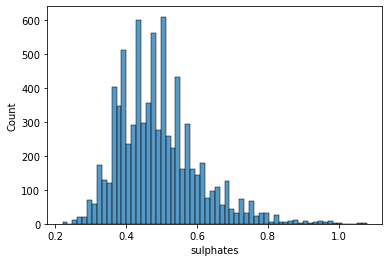

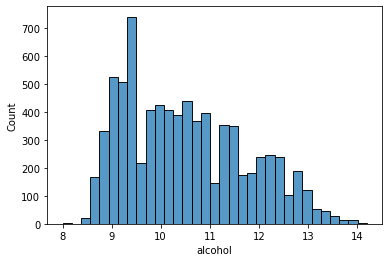

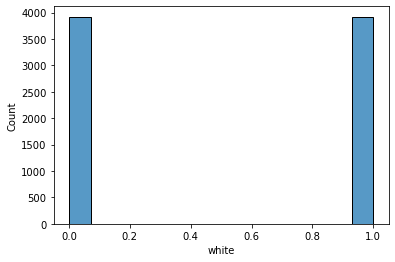

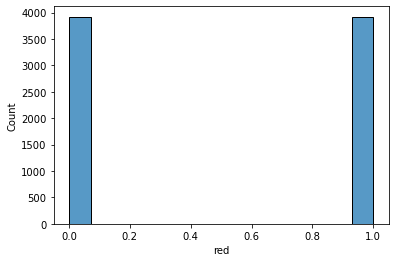

In [170]:
for column in x_train:
    sns.histplot(data=x_train, x=column)
    plt.show()

In [171]:
log_variables = ['fixed_acidity','volatile_acidity','residual_sugar','free_sulfur_dioxide','sulphates']
for i in log_variables:
    x_train[i] = np.log(x_train[i])

In [172]:
for i in log_variables:
    x_test[i] = np.log(x_test[i])

In [173]:
m(x_train, x_test, y_train, y_test)

Train Mean Square Error: 0.5517682781433977
Test Mean Square Error: 0.5600048478085253
Train Root Mean Square Error: 0.7428110649037194
Test Root Mean Square Error: 0.7483347164260958


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     291.8
Date:                Thu, 08 Jul 2021   Prob (F-statistic):               0.00
Time:                        01:04:41   Log-Likelihood:                -8789.1
No. Observations:                7836   AIC:                         1.760e+04
Df Residuals:                    7824   BIC:                         1.769e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6136      0.235      2.609      0.009       0.153       1.075
fixed_acidity           -0.3188      0.081     -3.954      0.000      -0.477      -0.161
volatile_acidity        -0.5538      0.027    -20.487      0.000      -0.607      -0.501
citric_acid              0.1700      0.085      2.004      0.045       0.004       0.336
residual_sugar           0.1370      0.011     12.694      0.000       0.116       0.158
chlorides               -0.1160      0.030     -3.907      0.000      -0.174      -0.058
free_sulfur_dioxide      0.2915      0.021     14.125      0.000       0.251       0.332
total_sulfur_dioxide    -0.1708      0.037     -4.561      0.000      -0.244      -0.097
pH                       0.1337      0.065      2.064      0.039       0.007       0.261
sulphates                0.2040      0.039      5.232      0.000       0.128       0.280
alcohol                  0.3535      0.009     39.354      0.000       0.336       0.371
white                    0.3109      0.118      2.636      0.008       0.080       0.542
red                      0.3028      0.118      2.568      0.010       0.072       0.534
==============================================================================
Omnibus:                      154.961   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              302.002
Skew:                           0.108   Prob(JB):                     2.64e-66
Kurtosis:                       3.937   Cond. No.                     1.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Analysis:**  